In [1]:
# 1 ЗАВДАННЯ:

In [24]:
# Завантажимо необхідні бібліотеки
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, applications
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

In [5]:
# Встановлення шляху до OpenSSL вручну
os.environ['OPENSSL_DIR'] = '/usr/local/opt/openssl'
os.environ['LD_LIBRARY_PATH'] = '/usr/local/opt/openssl/lib'

In [6]:
# Завантажимо датасет CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [7]:
# Нормалізуємо дані
train_images, test_images = train_images / 255.0, test_images / 255.0

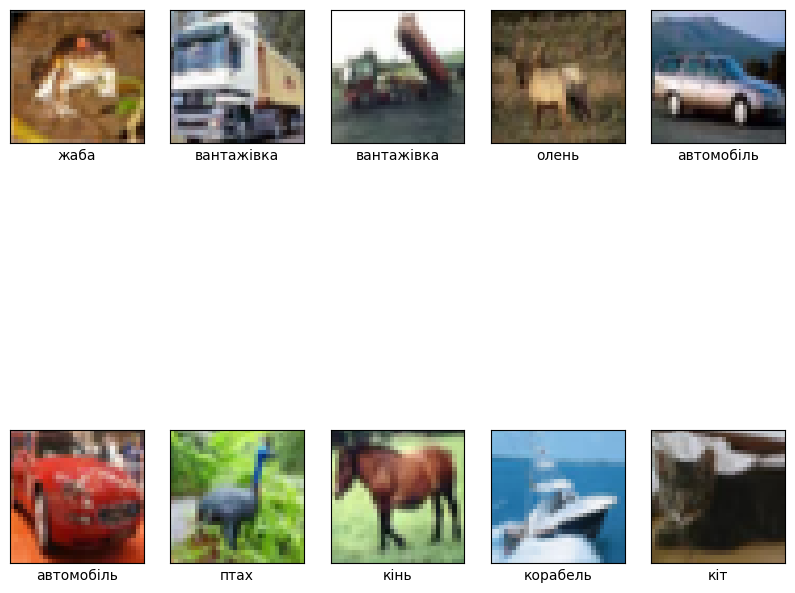

In [8]:
# Виведемо перші 10 зображень
class_names = ['літак', 'автомобіль', 'птах', 'кіт', 'олень', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [12]:
# Створимо модель згорткової нейронної мережі
model = models.Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [13]:
# Додавання шарів згладжування та повнозв'язних шарів
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
# Виведемо структуру моделі
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Компілюємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Встановимо колбеки для ранньої зупинки та зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

In [17]:
# Навчаємо модель
history = model.fit(train_images, train_labels, epochs=20, 
                    batch_size=64,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.3234 - loss: 1.8271 - val_accuracy: 0.4807 - val_loss: 1.4383 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5357 - loss: 1.3005 - val_accuracy: 0.5791 - val_loss: 1.1852 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5985 - loss: 1.1384 - val_accuracy: 0.6069 - val_loss: 1.0964 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6400 - loss: 1.0224 - val_accuracy: 0.6321 - val_loss: 1.0501 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6658 - loss: 0.9581 - val_accuracy: 0.6599 - val_loss: 0.9714 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6891 - loss: 0.8927 - val_accuracy: 0.6738 - val_loss: 0.9280 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7050 - l

In [18]:
# Побудуємо графіки функції втрат і точності
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Графік функції втрат')

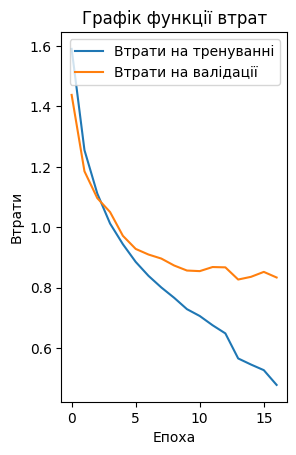

In [19]:
# Графік функції втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Втрати на тренуванні')
plt.plot(history.history['val_loss'], label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.title('Графік функції втрат')

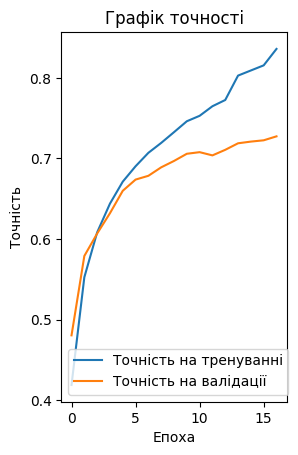

In [20]:
# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.title('Графік точності')

plt.show()

In [21]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Точність на тестових даних: {test_acc:.2f}')

313/313 - 1s - 5ms/step - accuracy: 0.7188 - loss: 0.8265
Точність на тестових даних: 0.72


In [22]:
# Класифікаційний звіт
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_labels, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

       літак       0.76      0.77      0.76      1000
  автомобіль       0.81      0.83      0.82      1000
        птах       0.64      0.59      0.61      1000
         кіт       0.56      0.50      0.53      1000
       олень       0.68      0.63      0.66      1000
      собака       0.61      0.64      0.62      1000
        жаба       0.79      0.80      0.80      1000
        кінь       0.68      0.81      0.74      1000
    корабель       0.87      0.78      0.82      1000
  вантажівка       0.77      0.83      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



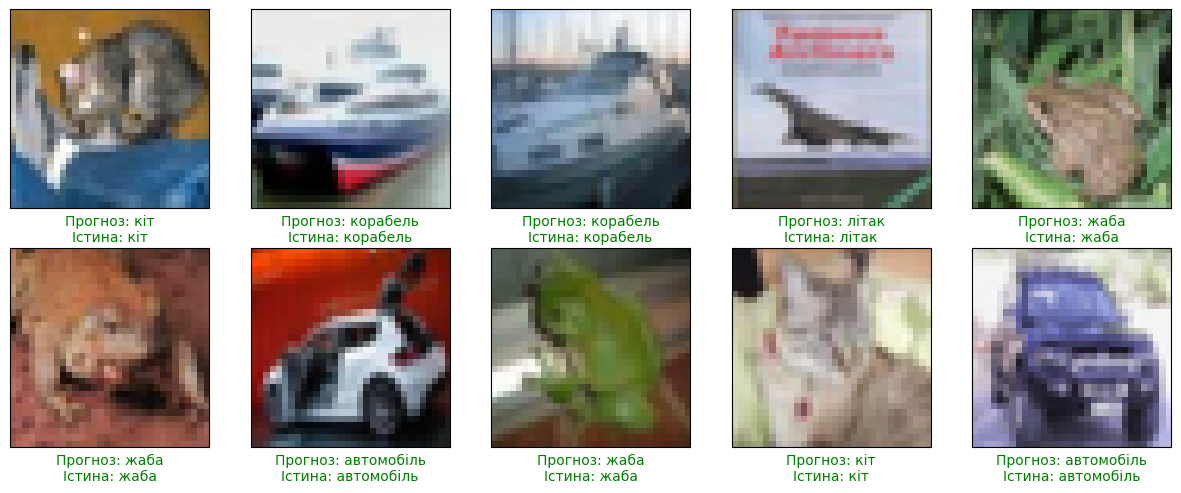

In [23]:
# Візуалізація розпізнавання
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = class_names[predicted_labels[i]]
    true_label = class_names[test_labels[i][0]]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"Прогноз: {predicted_label}\nІстина: {true_label}", color=color)
plt.show()

In [25]:
# 2 Завдання:

In [26]:
# Завантажимо попередньо навчену модель VGG16
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [27]:
# Заморозимо шари базової моделі
for layer in base_model.layers:
    layer.trainable = False

In [28]:
# Додамо нові шари для налаштування під наш датасет
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

In [29]:
# Створимо повну модель
model = Model(inputs=base_model.input, outputs=outputs)


In [30]:
# Виведемо структуру моделі
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [31]:
# Компілюємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# Встановимо колбеки для ранньої зупинки та зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

In [33]:
# Навчаємо модель
history = model.fit(train_images, train_labels, epochs=20, 
                    batch_size=64,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 163ms/step - accuracy: 0.4262 - loss: 1.6258 - val_accuracy: 0.5486 - val_loss: 1.2832 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 127s 162ms/step - accuracy: 0.5470 - loss: 1.2831 - val_accuracy: 0.5793 - val_loss: 1.1989 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 127s 163ms/step - accuracy: 0.5737 - loss: 1.2111 - val_accuracy: 0.5901 - val_loss: 1.1682 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 164ms/step - accuracy: 0.5838 - loss: 1.1775 - val_accuracy: 0.5974 - val_loss: 1.1414 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 127s 163ms/step - accuracy: 0.5998 - loss: 1.1448 - val_accuracy: 0.5998 - val_loss: 1.1389 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 164ms/step - accuracy: 0.6053 - loss: 1.1200 - val_accuracy: 0.6065 - val_loss: 1.1183 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 163ms/step - accura

In [34]:
# Побудуємо графіки функції втрат і точності
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Графік функції втрат')

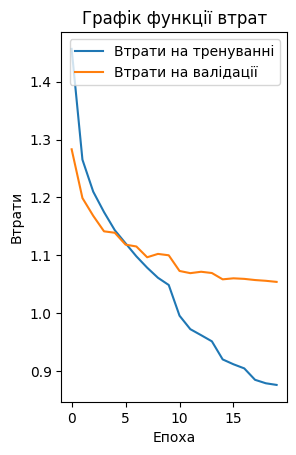

In [35]:
# Графік функції втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Втрати на тренуванні')
plt.plot(history.history['val_loss'], label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.title('Графік функції втрат')

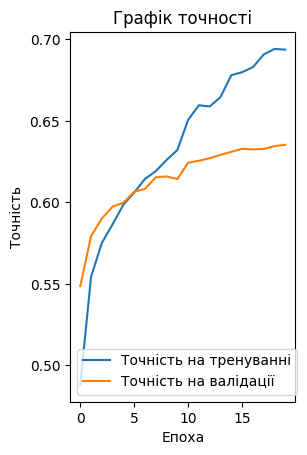

In [36]:
# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.title('Графік точності')

plt.show()

In [37]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Точність на тестових даних: {test_acc:.2f}')

313/313 - 26s - 82ms/step - accuracy: 0.6353 - loss: 1.0540
Точність на тестових даних: 0.64


In [38]:
# Класифікаційний звіт
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_labels, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step
              precision    recall  f1-score   support

       літак       0.71      0.73      0.72      1000
  автомобіль       0.68      0.71      0.70      1000
        птах       0.59      0.51      0.55      1000
         кіт       0.47      0.43      0.45      1000
       олень       0.60      0.56      0.58      1000
      собака       0.58      0.54      0.56      1000
        жаба       0.62      0.74      0.68      1000
        кінь       0.68      0.71      0.70      1000
    корабель       0.76      0.75      0.76      1000
  вантажівка       0.63      0.67      0.65      1000

    accuracy                           0.64     10000
   macro avg       0.63      0.64      0.63     10000
weighted avg       0.63      0.64      0.63     10000



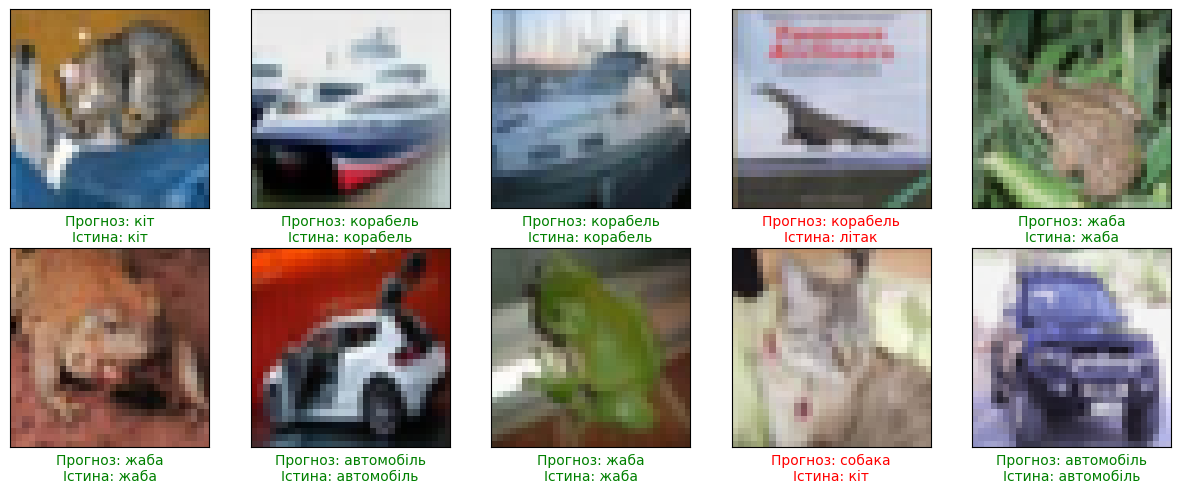

In [39]:
# Візуалізація розпізнавання
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = class_names[predicted_labels[i]]
    true_label = class_names[test_labels[i][0]]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"Прогноз: {predicted_label}\nІстина: {true_label}", color=color)
plt.show()
